#<font color="mintblue">Project: Loan Approval


**Project Description:**

This project builds a machine learning pipeline to predict loan approval outcomes based on applicant and financial data. It includes data cleaning, handling missing values and outliers, exploratory data analysis, and feature engineering to prepare the dataset for classification modeling.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
directory = "/content/drive/MyDrive/Colab Notebooks/Masterschool/Mock Interview /data"
# Import CSV Data
df_loans_modified = pd.read_csv(f'{directory}/loans_modified.csv')

#<font color="mintblue">1. Preprocessing & data cleaning</font>

In [4]:
# Display the Dataset
df_loans_modified.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
loan_id,LP001003,LP001005,LP001006,LP001008,LP001011,LP001013,LP001014,LP001018,LP001020,LP001024,LP001027,LP001028,LP001029,LP001030,LP001032,LP001034,LP001036,LP001038,LP001043,LP001046
gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,Female,Male,Male,Male
married,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,Yes
dependents,1,0,0,0,2,0,3+,2,1,2,2,2,0,2,0,1,NaN,0,0,1
education,Graduate,Graduate,Not Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Graduate,Not Graduate,Graduate,Not Graduate,Not Graduate,Graduate
self_employed,No,NaN,No,No,Yes,No,No,No,No,No,No,No,NaN,No,NaN,No,No,No,No,No
applicant_income,4583.0,3000.0,2583.0,6000.0,5417.0,2333.0,3036.0,4006.0,12841.0,3200.0,2500.0,3073.0,1853.0,1299.0,4950.0,3596.0,3510.0,4887.0,7660.0,5955.0
coapplicant_income,1508.0,0.0,2358.0,0.0,4196.0,1516.0,2504.0,1526.0,10968.0,700.0,1840.0,8106.0,2840.0,1086.0,0.0,0.0,0.0,0.0,0.0,5625.0
loan_amount,128.0,66.0,120.0,141.0,267.0,95.0,158.0,168.0,349.0,70.0,109.0,200.0,114.0,17.0,125.0,100.0,76.0,133.0,104.0,315.0
loan_amount_term,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,120.0,360.0,240.0,360.0,360.0,360.0,360.0


In [5]:
# Overviews of the DataFrame'df_loans_modified'
print(f' Shape of DF: {df_loans_modified.shape}')
print(df_loans_modified.info())
print(df_loans_modified.isnull().sum())

 Shape of DF: (563, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             534 non-null    object 
 1   gender              534 non-null    object 
 2   married             544 non-null    object 
 3   dependents          531 non-null    object 
 4   education           541 non-null    object 
 5   self_employed       529 non-null    object 
 6   applicant_income    537 non-null    float64
 7   coapplicant_income  529 non-null    float64
 8   loan_amount         533 non-null    float64
 9   loan_amount_term    535 non-null    float64
 10  credit_history      541 non-null    float64
 11  property_area       542 non-null    object 
 12  loan_status         535 non-null    float64
dtypes: float64(6), object(7)
memory usage: 57.3+ KB
None
loan_id               29
gender                29
married               19
dep

#<font color="mintblue">1.1 Converting data formats

In [6]:
# Converting dtypes DF
df_loans_modified = df_loans_modified.convert_dtypes()
df_loans_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             534 non-null    string 
 1   gender              534 non-null    string 
 2   married             544 non-null    string 
 3   dependents          531 non-null    string 
 4   education           541 non-null    string 
 5   self_employed       529 non-null    string 
 6   applicant_income    537 non-null    Int64  
 7   coapplicant_income  529 non-null    Float64
 8   loan_amount         533 non-null    Int64  
 9   loan_amount_term    535 non-null    Int64  
 10  credit_history      541 non-null    Int64  
 11  property_area       542 non-null    string 
 12  loan_status         535 non-null    Int64  
dtypes: Float64(1), Int64(5), string(7)
memory usage: 60.6 KB


In [7]:
# Run this code just 1x
# colomn:'gender' -> female=0 / male=1
df_loans_modified['gender'] = (df_loans_modified['gender'].astype(str).str.lower().str.strip().map({'female': 0, 'male': 1}))
df_loans_modified['gender'] = df_loans_modified['gender'].convert_dtypes()
# results
print(df_loans_modified['gender'].value_counts(dropna=False))

gender
1       433
0       101
<NA>     29
Name: count, dtype: Int64


In [8]:
# Run this code just 1x
# colomn:'married' -> no=0 / yes=1
df_loans_modified['married'] = (df_loans_modified['married'].astype(str).str.lower().str.strip().map({'no': 0, 'yes': 1}))
df_loans_modified['married'] = df_loans_modified['married'].convert_dtypes()
# results
print(df_loans_modified['married'].value_counts(dropna=False))

married
1       348
0       196
<NA>     19
Name: count, dtype: Int64


In [9]:
# Run this code just 1x
# colomn: 'dependents' -> 0=0 / 1=1 / 2=2 / 3=3 / 3+ = 3
df_loans_modified['dependents'] = (df_loans_modified['dependents'].astype(str).str.lower().str.strip().map({'0': 0, '1': 1, '2': 2, '3': 3, '3+': 3}))
df_loans_modified['dependents'] = df_loans_modified['dependents'].convert_dtypes()
# results
print(df_loans_modified['dependents'].value_counts(dropna=False))

dependents
0       307
1        93
2        88
3        43
<NA>     32
Name: count, dtype: Int64


In [10]:
# Run this code just 1x
# colomn: 'education' -> Not Graduate=0 / Graduate=1
df_loans_modified['education'] = (df_loans_modified['education'].astype(str).str.lower().str.strip().map({'not graduate': 0, 'graduate': 1}))
df_loans_modified['education'] = df_loans_modified['education'].convert_dtypes()
# results
print(df_loans_modified['education'].value_counts(dropna=False))

education
1       426
0       115
<NA>     22
Name: count, dtype: Int64


In [11]:
# Run this code just 1x
# colomn: 'self_employed' -> No=0 / Yes=1
df_loans_modified['self_employed'] = (df_loans_modified['self_employed'].astype(str).str.lower().str.strip().map({'no': 0, 'yes': 1}))
df_loans_modified['self_employed'] = df_loans_modified['self_employed'].convert_dtypes()
# results
print(df_loans_modified['self_employed'].value_counts(dropna=False))

self_employed
0       461
1        68
<NA>     34
Name: count, dtype: Int64


In [12]:
# Run this code just 1x
# colomn: 'property_area'
print(df_loans_modified['property_area'].unique())
# -> rural: 0, semiurban: 1, urban: 2
df_loans_modified['property_area'] = (df_loans_modified['property_area'].astype(str).str.lower().str.strip().map({'rural': 0, 'semiurban': 1, 'urban': 2}))
df_loans_modified['property_area'] = df_loans_modified['property_area'].convert_dtypes()
# results
print(df_loans_modified['property_area'].value_counts(dropna=False))

<StringArray>
['Rural', 'Urban', <NA>, 'Semiurban']
Length: 4, dtype: string
property_area
1       212
2       175
0       155
<NA>     21
Name: count, dtype: Int64


#<font color="mintblue">1.2 Outliers

In [13]:
#Overview of all numerical values
df_loans_modified.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,534.0,0.810861,0.391986,0.0,1.0,1.0,1.0,1.0
married,544.0,0.639706,0.480528,0.0,0.0,1.0,1.0,1.0
dependents,531.0,0.749529,1.003473,0.0,0.0,0.0,1.0,3.0
education,541.0,0.787431,0.409504,0.0,1.0,1.0,1.0,1.0
self_employed,529.0,0.128544,0.335012,0.0,0.0,0.0,0.0,1.0
applicant_income,537.0,5379.370577,6064.809533,150.0,2894.0,3762.0,5818.0,81000.0
coapplicant_income,529.0,1692.604764,3093.379309,0.0,0.0,1250.0,2333.0,41667.0
loan_amount,533.0,147.433396,85.851735,9.0,100.0,128.0,172.0,650.0
loan_amount_term,535.0,341.674766,65.301425,12.0,360.0,360.0,360.0,480.0
credit_history,541.0,0.878004,0.327584,0.0,1.0,1.0,1.0,1.0


There are outliers in the columns **'applicant_income'** and **'coapplicant_income'** that need to be analyze

In [14]:
# Boxplot and Histogram
def plot_distribution(df, column_name):
  """
  Plots a boxplot and a histogram for a given column in a DataFrame.

  Args:
    df: The pandas DataFrame.
    column_name: The name of the column to visualize.
  """
  fig, axes = plt.subplots(1, 2, figsize=(8, 4))

  # Boxplot
  sns.boxplot(y=df[column_name], ax=axes[0], color="yellow")
  axes[0].set_title(f'Boxplot of {column_name}')

  # Histogram
  sns.histplot(df[column_name], ax=axes[1], kde=True, color="green")
  axes[1].set_title(f'Histogram of {column_name}')

  # Plot
  plt.tight_layout()
  plt.show()

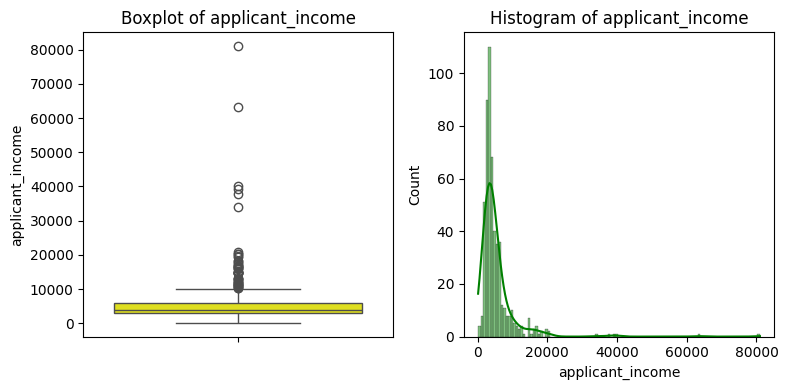

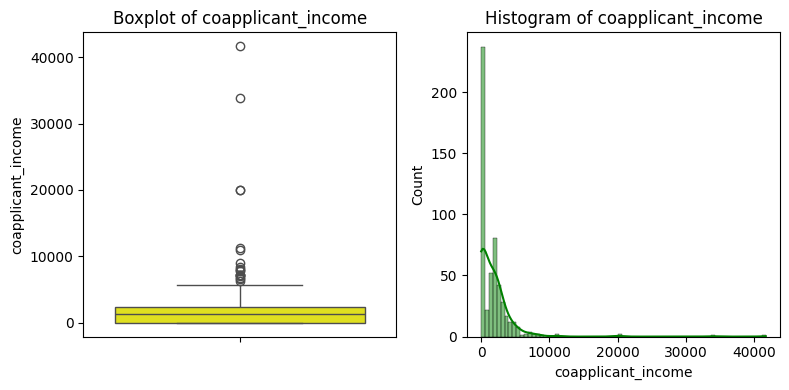

In [15]:
# Plot before cleanup
plot_distribution(df_loans_modified, 'applicant_income')
plot_distribution(df_loans_modified, 'coapplicant_income')

In [16]:
def clip_outliers_iqr(df, column_name):
  """
  Clipping outliers from a specified column in a DataFrame using the IQR method.

  Args:
    df: The pandas DataFrame.
    column_name: The name of the column to clip outliers from.

  Returns:
    A new DataFrame with outliers clipped.
  """
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df_clipped = df.copy()
  df_clipped[column_name] = df_clipped[column_name].clip(lower_bound, upper_bound)

  print(f"Clipped outliers from the '{column_name}' column.")

  return df_clipped

In [17]:
# clip outliers
df_loans_clip1 = df_loans_modified.copy()
df_loans_clip1 = clip_outliers_iqr(df_loans_modified, "applicant_income")
df_loans_clip2 = clip_outliers_iqr(df_loans_clip1, "coapplicant_income")
df_loans_clipped = df_loans_clip2

Clipped outliers from the 'applicant_income' column.
Clipped outliers from the 'coapplicant_income' column.


Results of outlier clipping:

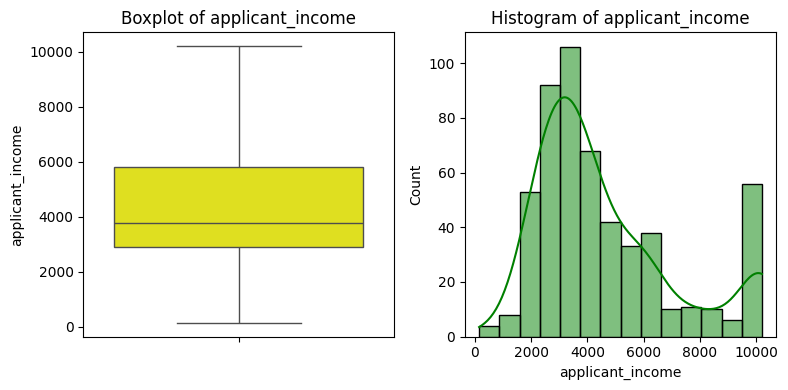

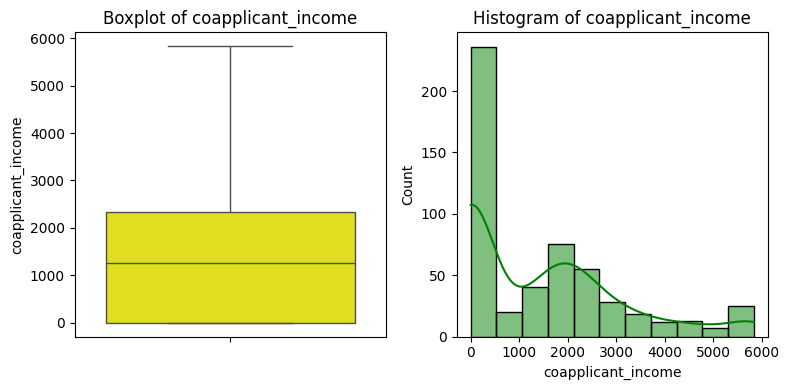

In [18]:
# Plot: clip outliers
plot_distribution(df_loans_clipped, 'applicant_income')
plot_distribution(df_loans_clipped, 'coapplicant_income')

#<font color="mintblue">1.3 NaN Values and Duplicates

In [19]:
# Check duplicates
df_loans_clipped.duplicated().sum()

np.int64(25)

In [20]:
# Delete duplicates
df_loans_cleanup = df_loans_clipped.copy()
df_loans_cleanup = df_loans_cleanup.drop_duplicates()
df_loans_cleanup.duplicated().sum()

np.int64(0)

In [21]:
# Display NaN values before cleaning
print(df_loans_cleanup.isnull().sum())

loan_id               26
gender                27
married               19
dependents            30
education             21
self_employed         32
applicant_income      24
coapplicant_income    32
loan_amount           30
loan_amount_term      25
credit_history        22
property_area         20
loan_status           28
dtype: int64


The raws **with NaN values** of 'loan_id' and 'loan_status' will be deleted because of missing critical information

In [22]:
# Delete all raws with 'loan_id' as NaN
print("Shape before:", df_loans_cleanup.shape)
# Delete:
df_loans_cleanup.dropna(subset=['loan_id'], inplace=True)
df_loans_cleanup.dropna(subset=['loan_status'], inplace=True)
print("Shape after:", df_loans_cleanup.shape)

Shape before: (538, 13)
Shape after: (486, 13)


The **categorial** remaining NaN values ​​are assigned the average

In [23]:
df_loans_cleanup.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,465.0,0.802151,0.398807,0.0,1.0,1.0,1.0,1.0
married,469.0,0.637527,0.481228,0.0,0.0,1.0,1.0,1.0
dependents,458.0,0.772926,1.016692,0.0,0.0,0.0,2.0,3.0
education,467.0,0.777302,0.416503,0.0,1.0,1.0,1.0,1.0
self_employed,456.0,0.129386,0.335995,0.0,0.0,0.0,0.0,1.0
applicant_income,463.0,4649.561555,2502.607037,150.0,2937.0,3846.0,5825.0,10204.0
coapplicant_income,455.0,1483.64422,1676.93018,0.0,0.0,1255.0,2338.0,5832.5
loan_amount,458.0,149.253275,87.707424,9.0,102.0,128.0,172.0,650.0
loan_amount_term,463.0,340.768898,66.987598,12.0,360.0,360.0,360.0,480.0
credit_history,468.0,0.882479,0.322385,0.0,1.0,1.0,1.0,1.0


In [24]:
# 'gender' NaN values: 1
df_loans_cleanup['gender'] = df_loans_cleanup['gender'].fillna(1)
# 'married' NaN values: 1
df_loans_cleanup['married'] = df_loans_cleanup['married'].fillna(1)
# 'dependents' NaN values: 0
df_loans_cleanup['dependents'] = df_loans_cleanup['dependents'].fillna(0)
# 'education' NaN values: 1
df_loans_cleanup['education'] = df_loans_cleanup['education'].fillna(1)
# 'self_employed' NaN values: 0
df_loans_cleanup['self_employed'] = df_loans_cleanup['self_employed'].fillna(0)
# 'credit_history' NaN values: 1
df_loans_cleanup['credit_history'] = df_loans_cleanup['credit_history'].fillna(1)

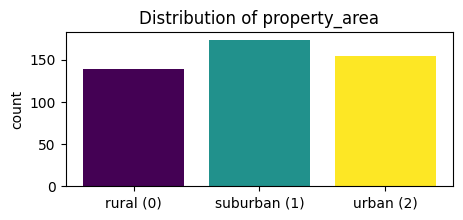

In [25]:
# Analyze the 3 categorical values of 'property_area':
# rural: 0, suburban: 1, urban: 2

counts = df_loans_cleanup['property_area'].value_counts().sort_index()
colors = plt.cm.viridis(np.linspace(0, 1, len(counts)))

fig, ax = plt.subplots(figsize=(5, 2))
ax.bar(counts.index, counts.values, color=colors)

#x-axis ticks
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(["rural (0)", "suburban (1)", "urban (2)"])

#ax.set_xlabel("property_area")
ax.set_ylabel("count")
ax.set_title("Distribution of property_area")

plt.show()


In [26]:
# 'property_area' NaN values: 1 (suburban)
df_loans_cleanup['property_area'] = df_loans_cleanup['property_area'].fillna(1)


The **numerical** remaining NaN values ​​are assigned the mean

In [27]:
# Convert all numeric values ​​to float values
df_loans_cleanup['applicant_income'] = df_loans_cleanup['applicant_income'].astype(float)
df_loans_cleanup['coapplicant_income'] = df_loans_cleanup['coapplicant_income'].astype(float)
df_loans_cleanup['loan_amount'] = df_loans_cleanup['loan_amount'].astype(float)
df_loans_cleanup['loan_amount_term'] = df_loans_cleanup['loan_amount_term'].astype(float)

In [28]:
# 'applicant_income' NaN values -> mean
df_loans_cleanup['applicant_income'] = df_loans_cleanup['applicant_income'].fillna(df_loans_cleanup['applicant_income'].mean())
# 'coapplicant_income' NaN values -> mean
df_loans_cleanup['coapplicant_income'] = df_loans_cleanup['coapplicant_income'].fillna(df_loans_cleanup['coapplicant_income'].mean())
# 'loan_amount' NaN values -> mean
df_loans_cleanup['loan_amount'] = df_loans_cleanup['loan_amount'].fillna(df_loans_cleanup['loan_amount'].mean())
# 'loan_amount_term' NaN values -> mean
df_loans_cleanup['loan_amount_term'] = df_loans_cleanup['loan_amount_term'].fillna(df_loans_cleanup['loan_amount_term'].mean())

In [29]:
# Display NaN values after cleaning
print(df_loans_cleanup.isnull().sum())

loan_id               0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_amount_term      0
credit_history        0
property_area         0
loan_status           0
dtype: int64


#<font color="mintblue">2. Feature Engineering

In [30]:
# create DF for Feature Engineering: 'df_loans_feature'
df_loans_feature = df_loans_cleanup.copy()

In [31]:
# Total Income:
df_loans_feature["total_income"] = df_loans_feature["applicant_income"] + df_loans_feature["coapplicant_income"]

# Delete redundant information 'applicant_income' & 'coapplicant_income'
df_loans_feature.drop(columns=['applicant_income', 'coapplicant_income'], inplace=True)

# Loan to Income (The resulting value indicates how many annual salaries are needed for the loan.)
df_loans_feature["loan_to_income"] = ((df_loans_feature["loan_amount"] * 1000) / (df_loans_feature["total_income"] * 12)).round(2)

In [32]:
df_loans_feature.head()

,loan_id,gender,married,dependents,education,self_employed,loan_amount,loan_amount_term,credit_history,property_area,loan_status,total_income,loan_to_income
0,LP001003,1,1,1,1,0,128.0,360.0,1,0,0,6091.0,1.75
1,LP001005,1,1,0,1,0,66.0,360.0,1,2,1,3000.0,1.83
2,LP001006,1,1,0,0,0,120.0,360.0,1,2,1,4941.0,2.02
3,LP001008,1,0,0,1,0,141.0,360.0,1,2,1,6000.0,1.96
4,LP001011,1,1,2,1,1,267.0,360.0,1,2,1,9613.0,2.31


In [33]:
# CSV export
df_loans_feature.to_csv(f'{directory}/loans_feature.csv', index=False)

#<font color="mintblue">3. EDA

In [34]:
df_loans_feature.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,486.0,0.8107,0.392151,0.0,1.0,1.0,1.0,1.0
married,486.0,0.650206,0.477396,0.0,0.0,1.0,1.0,1.0
dependents,486.0,0.728395,1.00324,0.0,0.0,0.0,1.0,3.0
education,486.0,0.786008,0.410544,0.0,1.0,1.0,1.0,1.0
self_employed,486.0,0.121399,0.326927,0.0,0.0,0.0,0.0,1.0
loan_amount,486.0,149.253275,85.138028,9.0,104.0,130.0,166.75,650.0
loan_amount_term,486.0,340.768898,65.379941,12.0,360.0,360.0,360.0,480.0
credit_history,486.0,0.886831,0.317125,0.0,1.0,1.0,1.0,1.0
property_area,486.0,1.030864,0.77664,0.0,0.0,1.0,2.0,2.0
loan_status,486.0,0.711934,0.453329,0.0,0.0,1.0,1.0,1.0


In [35]:
# Color palette for EDA plots
palette = {
    1: "#2ca02c",  # Fully Paid (green)
    0: "#d62728",  # Charged Off (red)
}

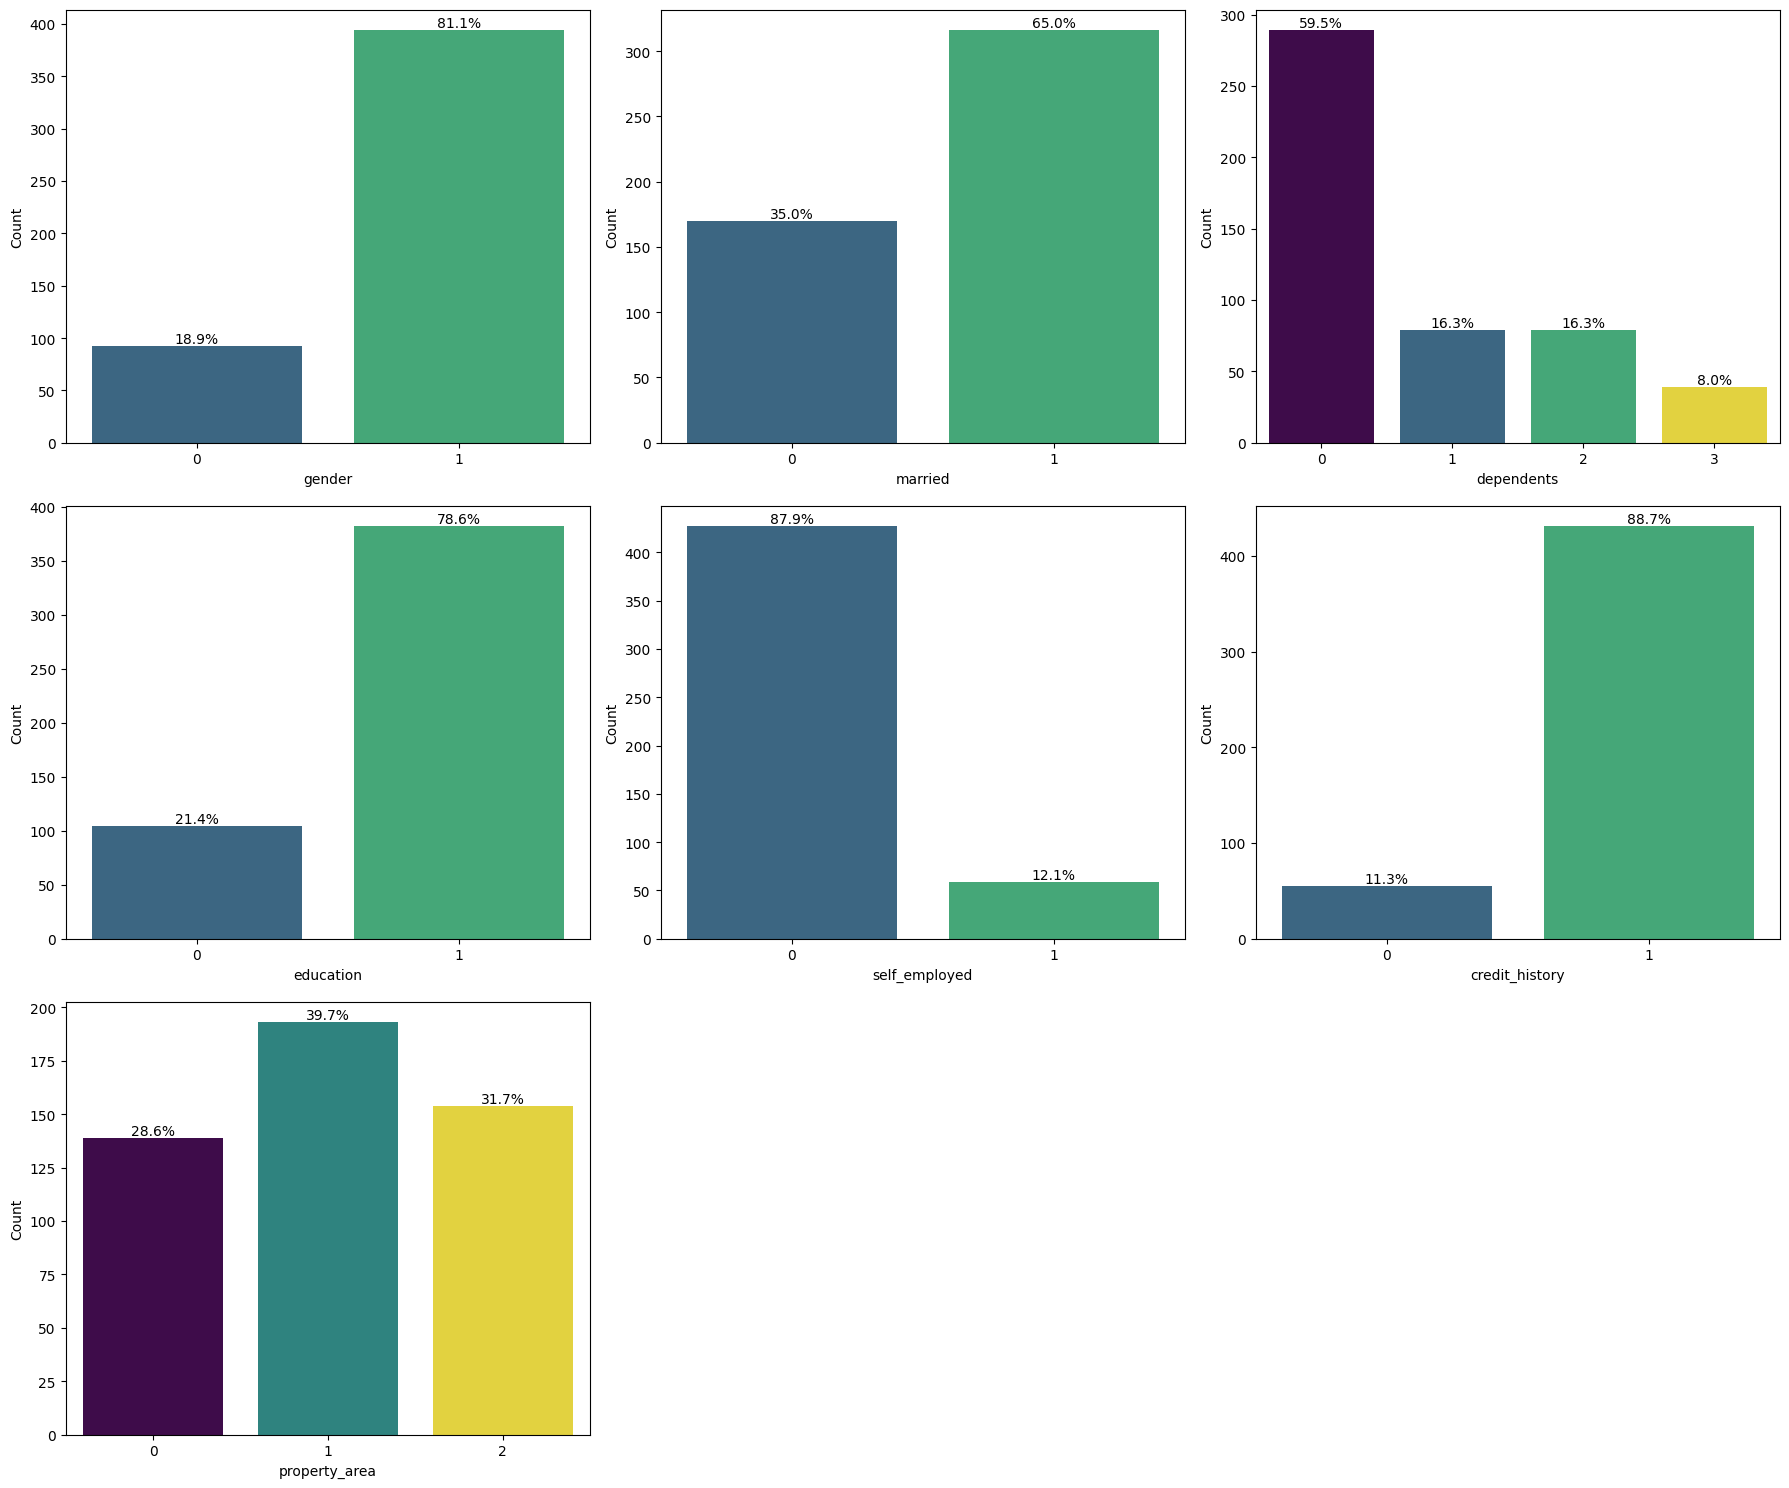

In [36]:
# Distribution of the categorical values ​
categorical_cols = ['gender', 'married', 'dependents', 'education', 'self_employed', 'credit_history', 'property_area']

fig, axs = plt.subplots(3, 3, figsize=(18, 15))
axs = axs.flatten()

for i, col in enumerate(categorical_cols):
    ax = sns.countplot(
        x=col,
        hue=col,
        data=df_loans_feature,
        palette="viridis",
        legend=False,
        ax=axs[i]
    )

    total = len(df_loans_feature[col])

    for p in ax.patches:
        count = p.get_height()
        percentage = (count / total) * 100
        ax.annotate(
            f"{percentage:.1f}%",
            (p.get_x() + p.get_width() / 2, count),
            ha="center",
            va="bottom",
            fontsize=10
        )

    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.tick_params(axis="x", rotation=0)

# Remove unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

**Insights from Categorical Feature Distributions:**

Gender: The dataset is strongly male-dominated.

Marital Status: Most applicants are married.

Dependents: The majority of applicants have no dependents, while larger families are relatively rare.

Education: Most applicants are graduates.

Self-Employment: Most applicants are not self-employed, and only a small portion is self-employed.

Credit History: Most applicants have a positive credit history, which may strongly influence loan approval decisions.

Property Area: Applicants are fairly evenly distributed across rural, suburban, and urban areas, with suburban being slightly more common.

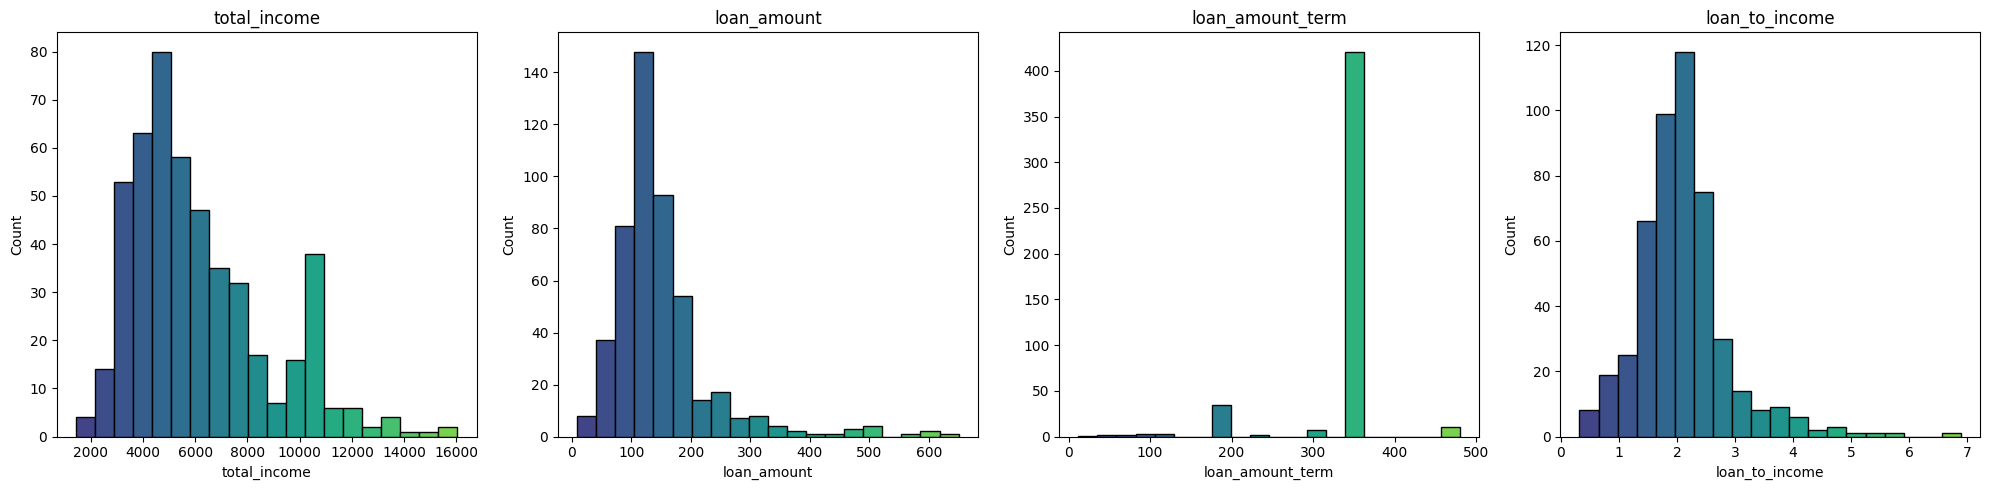

In [37]:
# Distribution of numerical values ​
num_features = ['total_income', 'loan_amount', 'loan_amount_term', 'loan_to_income']

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
axs = axs.flatten()

for i, col in enumerate(num_features):
    # Compute histogram values (counts)
    values, bins = np.histogram(df_loans_feature[col].dropna(), bins=20)

    # Create bar plot with viridis colors
    bars = axs[i].bar(
        bins[:-1],
        values,
        width=np.diff(bins),
        align='edge',
        edgecolor='black',
        color=plt.cm.viridis(np.linspace(0.2, 0.8, len(values)))
    )

    # Title and labels
    axs[i].set_title(col)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

**Insights from Numerical Feature Distributions:**

Total Income: The distribution is right-skewed, meaning most applicants have a lower to mid-range income, while a smaller group has significantly higher incomes (outlier clipping).

Loan Amount: Loan amounts are also right-skewed. Most loans are concentrated in the lower range, with fewer applicants requesting very large loan amounts.

Loan Amount Term: The loan term is highly concentrated around one dominant value, suggesting that most applicants choose the same repayment duration, while only a small number use shorter or longer terms.

Loan-to-Income Ratio: The ratio shows a moderate right-skew, meaning most applicants have a reasonable loan burden relative to their income, but some have high loan-to-income ratios, which could indicate increased financial risk.

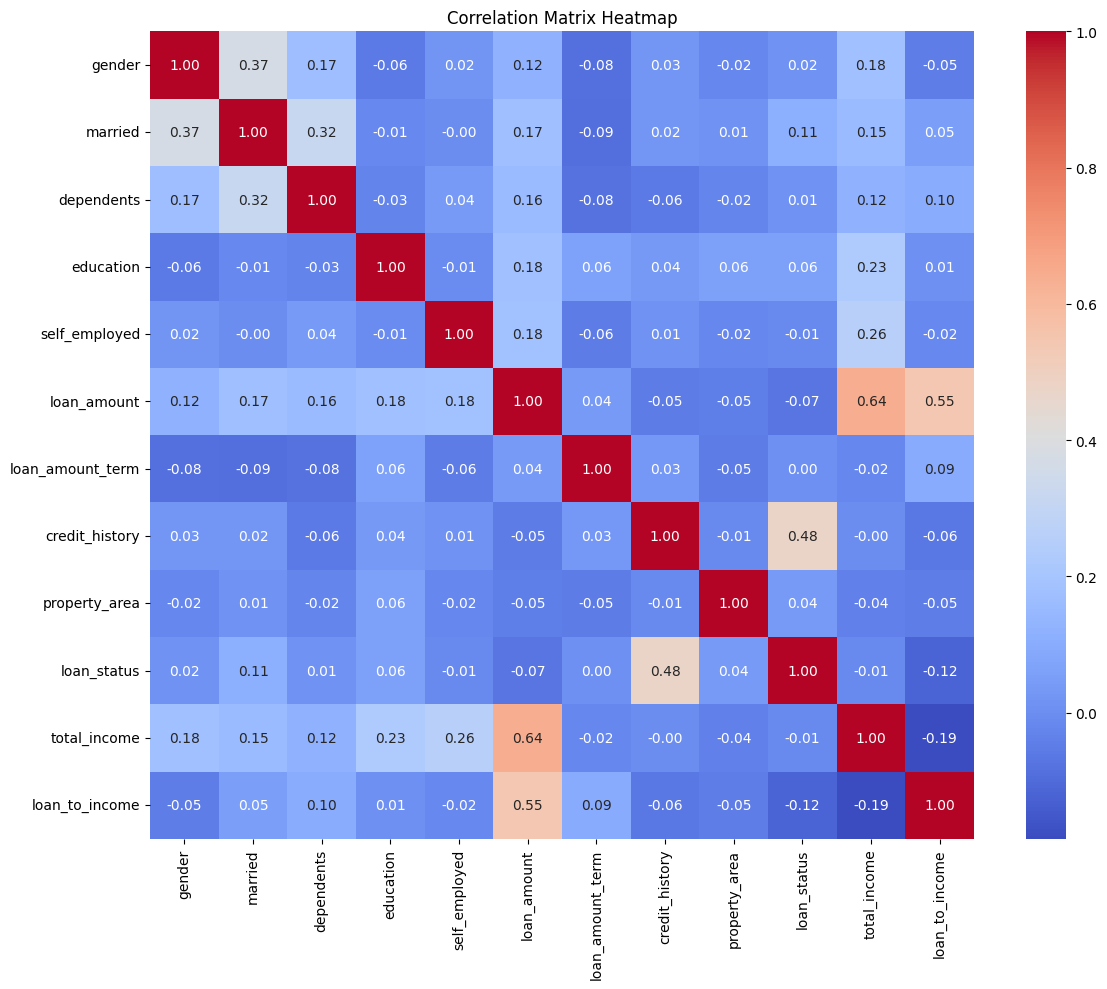

In [38]:
# Correlation Matrix:
# drop useless informations
corr_matrix = df_loans_feature.drop(columns='loan_id',axis=1).corr(numeric_only=True)

# create the Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

**Key Insights:**

Credit history is the strongest indicator of loan approval.

Loan amount is closely linked to income-related features, meaning applicants with higher income tend to request larger loans.

Most features show no strong correlations.



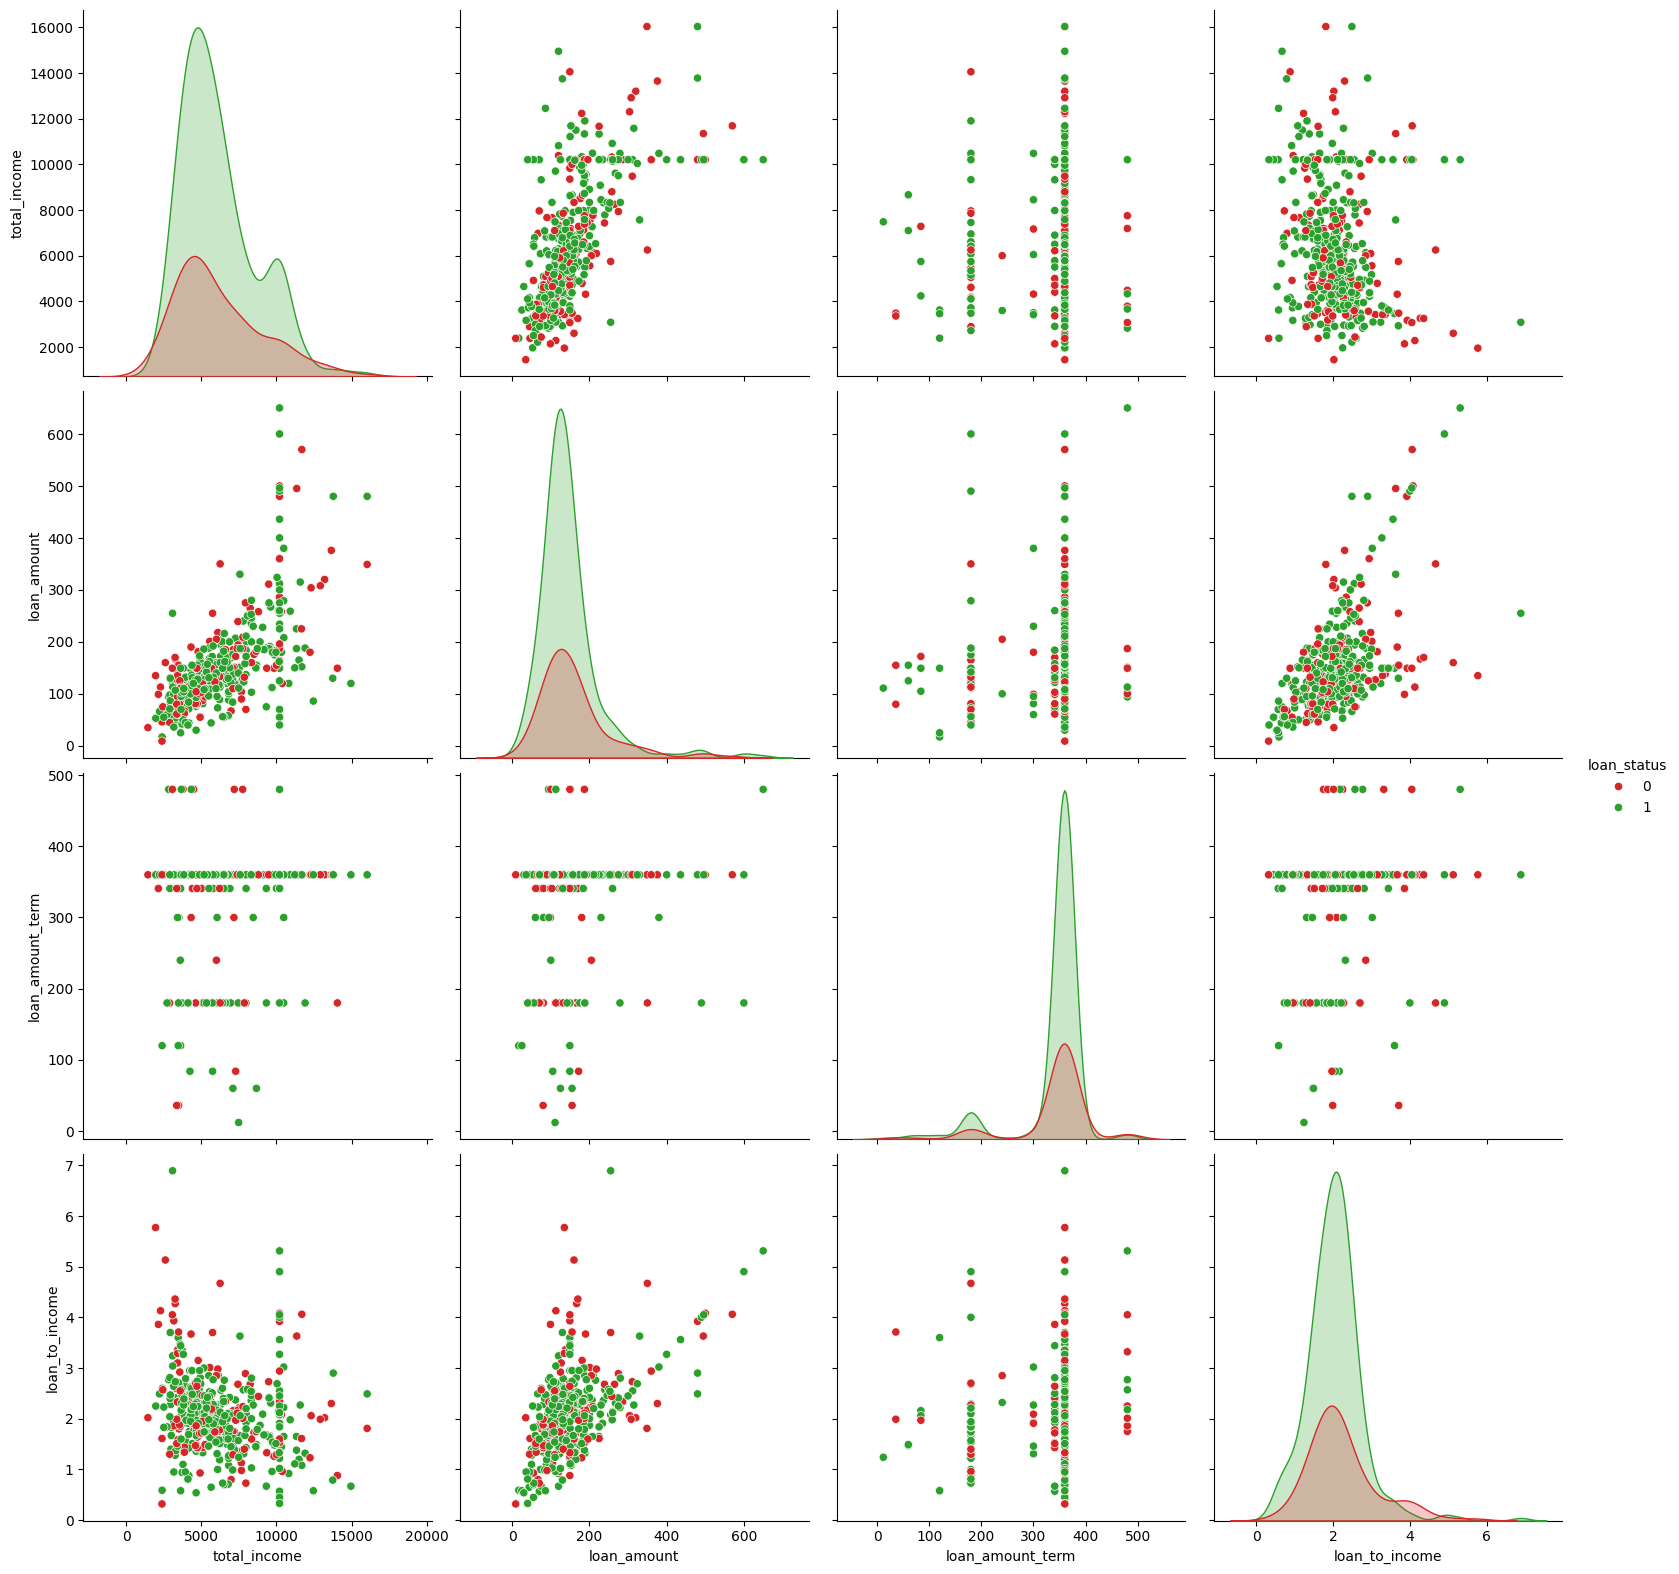

In [39]:
# Pairplot of numerical values ​
sns.pairplot(df_loans_feature, vars=['total_income', 'loan_amount', 'loan_amount_term', 'loan_to_income'],
             hue='loan_status', palette=palette, diag_kind='kde', height=4 , aspect=1)
plt.show()


**Insights from the Pairplot:**

Total Income vs. Loan Amount:
There is a clear positive relationship between total income and loan amount. Applicants with higher income generally request larger loans.

Loan Amount vs. Loan-to-Income Ratio:
The loan-to-income ratio tends to increase with higher loan amounts

Class Overlap:
Across most feature combinations, approved and rejected cases overlap strongly, suggesting that loan approval decisions depend on multiple features combined, rather than a single variable.

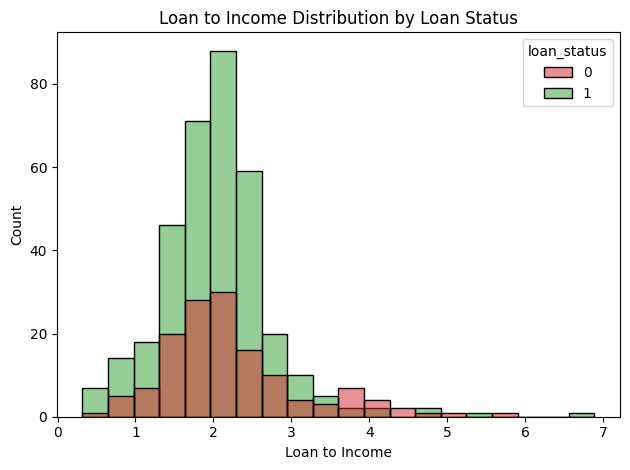

In [40]:
sns.histplot(
    data=df_loans_feature,
    x="loan_to_income",
    hue="loan_status",
    palette=palette,
    bins=20,
    stat="count"
)

plt.title("Loan to Income Distribution by Loan Status")
plt.xlabel("Loan to Income")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Loan-to-Income vs. Loan Status

Approved loans are mostly concentrated at lower loan-to-income ratios, while higher ratios show more rejections.

Both classes overlap, so this feature alone is not sufficient to fully separate approvals from rejections.

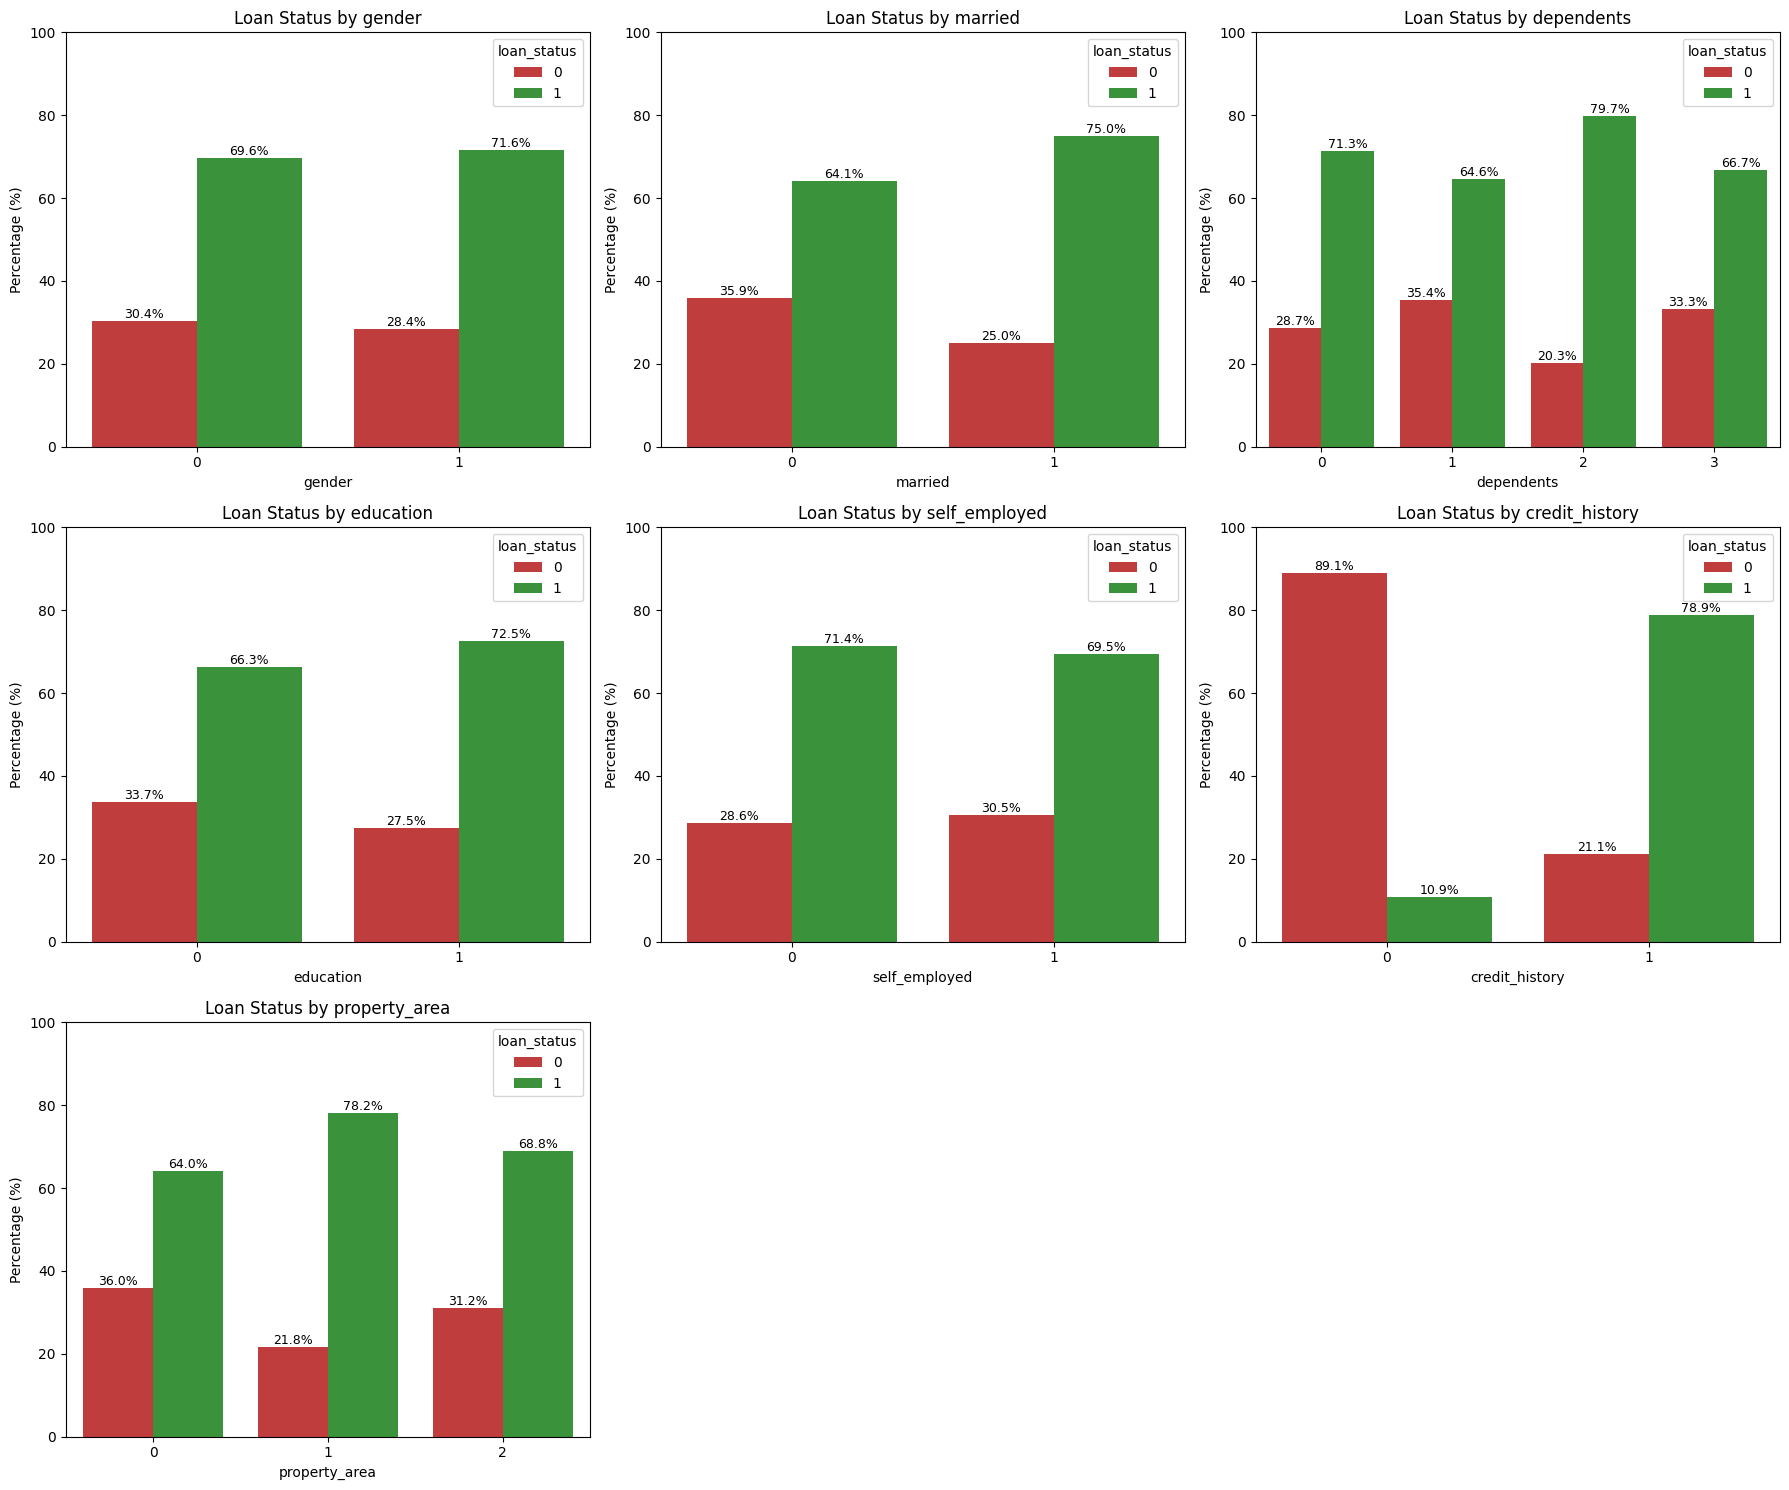

In [41]:
# Categorical features vs target with percentages
columns_to_plot = ["gender", "married", "dependents", "education", "self_employed", "credit_history", "property_area"]

n_cols = 3
n_rows = math.ceil(len(columns_to_plot) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    # Calculate percentages per category and loan_status
    data_pct = (
        df_loans_feature
        .groupby([col, "loan_status"])
        .size()
        .reset_index(name="count")
    )

    # Normalize counts to percentages within each category
    data_pct["percentage"] = (
        data_pct["count"] /
        data_pct.groupby(col)["count"].transform("sum") * 100
    )

    # Create bar plot
    sns.barplot(
        data=data_pct,
        x=col,
        y="percentage",
        hue="loan_status",
        palette=palette,
        ax=axes[i]
    )

    # Add percentage labels on bars
    for container in axes[i].containers:
        axes[i].bar_label(
            container,
            fmt="%.1f%%",
            label_type="edge",
            fontsize=9
        )

    axes[i].set_title(f"Loan Status by {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Percentage (%)")
    axes[i].set_ylim(0, 100)
    axes[i].tick_params(axis="x", rotation=0)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Loan Approval Rates by Categorical Features:**

Gender: Approval rates are very similar across genders, suggesting only a weak impact on the decision.

Marital Status: Married applicants tend to have a higher approval rate compared to non-married applicants.

Dependents: Approval rates vary across groups, but there is no strong consistent trend across the number of dependents.

Education: Graduates show a slightly higher approval rate than non-graduates.

Self-Employment: Self-employed and non-self-employed applicants have very similar approval rates, indicating limited predictive value.

Credit History: This feature shows the clearest separation — applicants with a positive credit history are far more likely to be approved, while those without it are mostly rejected.

Property Area: Suburban applicants show the highest approval rate, while rural and urban areas are slightly lower, but differences are moderate.

#<font color="mintblue">4. Machine Learning


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    roc_curve,
    auc
)

In [49]:
# Import CSV Data
df = pd.read_csv(f'{directory}/loans_feature.csv')

In [50]:
#Remove 'loan_id' column, because it is not useful for model training
df = df.drop("loan_id", axis=1)

#<font color="mintblue">Feature & Target

In [51]:
# Split the dataset into features (input variables) and target (output variable).
# 'features' contains all columns except 'loan_status', which is the value we want to predict.
target = df['loan_status']
features = df.drop("loan_status", axis=1)


#<font color="mintblue">Train-Test-Split

In [52]:
# Train-Test-Split (80% Train, 20% Test Ratio)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#<font color="mintblue">Scaling

In [53]:
# Scaling the features standardizes their range, ensuring that all variables contribute equally to the model.
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#<font color="mintblue">4.1 Logistic Regression

In [54]:
# Creation of the Logistic Regression model & Training
model = LogisticRegression(C=1.0, max_iter=100)
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [55]:
# Getting the predictions.
y_pred = model.predict(X_test_scaled)


In [56]:
# Logistic Regression Metrics
metrics_lr = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average='weighted'),
    "Recall": recall_score(y_test, y_pred, average='weighted'),
    "F1-score": f1_score(y_test, y_pred, average='weighted')
}
conf_matrix_lr = confusion_matrix(y_test, y_pred)

In [57]:
# Display Metrics
print("Logistic Regression Metrics:")
for k, v in metrics_lr.items():
    print(f"{k}: {v:.4f}")

Logistic Regression Metrics:
Accuracy: 0.8776
Precision: 0.8787
Recall: 0.8776
F1-score: 0.8696


#<font color="mintblue">4.2 Random Forest

In [58]:
#Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=130,
    max_depth=20,
    random_state=42,
    class_weight='balanced'
)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

metrics_rf = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf, average='weighted'),
    "Recall": recall_score(y_test, y_pred_rf, average='weighted'),
    "F1-score": f1_score(y_test, y_pred_rf, average='weighted')
}
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

In [59]:
# Display Metrics
print("\nRandom Forest Metrics:")
for k, v in metrics_rf.items():
    print(f"{k}: {v:.4f}")


Random Forest Metrics:
Accuracy: 0.8776
Precision: 0.8744
Recall: 0.8776
F1-score: 0.8741


#<font color="mintblue">4.3 Comparison of Logistic Regression & Random Forest

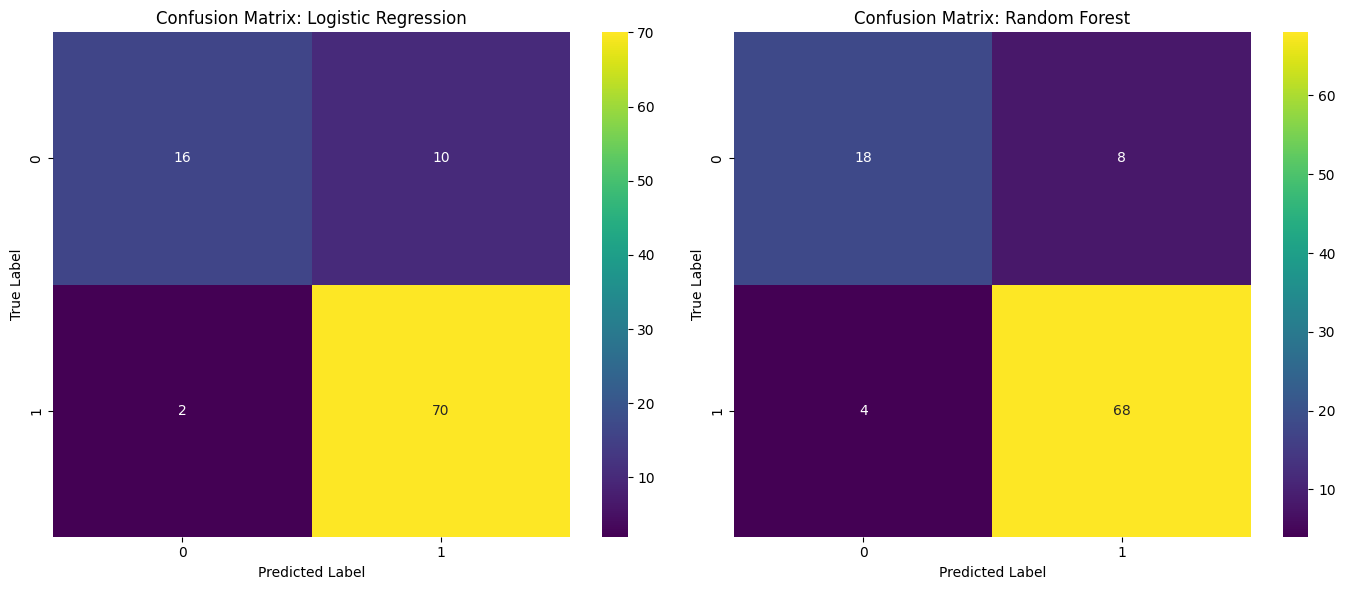

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Logistic Regression Confusion Matrix
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='viridis', ax=axes[0])
axes[0].set_title('Confusion Matrix: Logistic Regression')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Random Forest Confusion Matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='viridis', ax=axes[1])
axes[1].set_title('Confusion Matrix: Random Forest')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

In [61]:
comparison = pd.DataFrame(
    [metrics_lr, metrics_rf],
    index=["Logistic Regression", "Random Forest"]
)

comparison

,Accuracy,Precision,Recall,F1-score
Logistic Regression,0.877551,0.878685,0.877551,0.869642
Random Forest,0.877551,0.874426,0.877551,0.874104


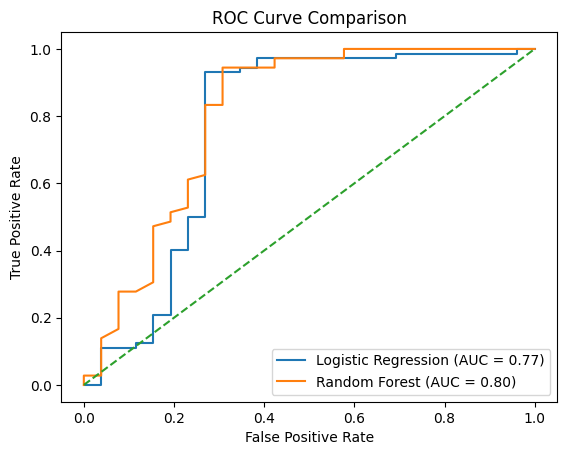

In [62]:
# Logistic Regression probabilities
y_prob_lr = model.predict_proba(X_test_scaled)[:, 1]

# Random Forest probabilities
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)

plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


#Model Evaluation Summary: **Logistic Regression vs. Random Forest**

Both models achieved very similar overall performance on the test set, indicating that they classify loan approvals at a comparable level.

Based on the confusion matrices, Logistic Regression identified slightly more approved loans and produced fewer false negatives, which is important because rejecting eligible applicants reduces the model’s practical usefulness.

Random Forest showed a slightly stronger overall ranking performance and marginal improvements in combined classification metrics, although the differences between the models remain small.

To make a final decision and reduce the risk of conclusions based on a single train-test split, both models will be evaluated using cross-validation.


#<font color="mintblue">4.4 Treshold Tuning of Logistic Regression

In [63]:
# Predict probabilities
y_prob = model.predict_proba(X_test_scaled)[:, 1]

threshold_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5,
                  0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99]

results = []

for t in threshold_list:
    y_pred = (y_prob >= t).astype(int)

    results.append({
        "threshold": t,
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average="weighted", zero_division=0),
        "recall": recall_score(y_test, y_pred, average="weighted", zero_division=0),
        "f1_score": f1_score(y_test, y_pred, average="weighted", zero_division=0)
    })

df_thresholds = pd.DataFrame(results)
df_thresholds

,threshold,accuracy,precision,recall,f1_score
0,0.05,0.744898,0.810646,0.744898,0.645664
1,0.10,0.806122,0.821932,0.806122,0.769274
2,0.15,0.857143,0.859321,0.857143,0.844774
3,0.20,0.867347,0.869014,0.867347,0.857366
4,0.25,0.867347,0.869014,0.867347,0.857366
5,0.30,0.867347,0.869014,0.867347,0.857366
6,0.35,0.867347,0.869014,0.867347,0.857366
7,0.40,0.867347,0.869014,0.867347,0.857366
8,0.45,0.877551,0.878685,0.877551,0.869642
9,0.50,0.877551,0.878685,0.877551,0.869642


#<font color="mintblue">4.5 Cross Validation Logistic Regression

In [64]:
# Stratified CV keeps class distribution equal in each fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Pipeline: Scaling + Logistic Regression
pipe_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=2000, class_weight="balanced", random_state=42))
])

# Metrics to evaluate
scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1",
    "roc_auc": "roc_auc"
}

# Run Cross Validation
cv_results = cross_validate(pipe_lr, features, target, cv=cv, scoring=scoring, n_jobs=-1)

# Show results nicely
summary_lr = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1", "ROC AUC"],
    "Mean": [
        cv_results["test_accuracy"].mean(),
        cv_results["test_precision"].mean(),
        cv_results["test_recall"].mean(),
        cv_results["test_f1"].mean(),
        cv_results["test_roc_auc"].mean()
    ],
    "Std": [
        cv_results["test_accuracy"].std(),
        cv_results["test_precision"].std(),
        cv_results["test_recall"].std(),
        cv_results["test_f1"].std(),
        cv_results["test_roc_auc"].std()
    ]
})

summary_lr


,Metric,Mean,Std
0,Accuracy,0.746876,0.014576
1,Precision,0.816296,0.013017
2,Recall,0.832257,0.028900
3,F1,0.823785,0.012673
4,ROC AUC,0.701216,0.031429


#<font color="mintblue">4.6 Cross Validation Random Forest

In [65]:
# Stratified CV keeps class distribution equal in each fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=130,
    max_depth=20,
    random_state=42,
    class_weight="balanced"
)

# Metrics to evaluate
scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1",
    "roc_auc": "roc_auc"
}

# Run Cross Validation
cv_results_rf = cross_validate(rf_model, features, target, cv=cv, scoring=scoring, n_jobs=-1)

# Show results nicely
summary_rf = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1", "ROC AUC"],
    "Mean": [
        cv_results_rf["test_accuracy"].mean(),
        cv_results_rf["test_precision"].mean(),
        cv_results_rf["test_recall"].mean(),
        cv_results_rf["test_f1"].mean(),
        cv_results_rf["test_roc_auc"].mean()
    ],
    "Std": [
        cv_results_rf["test_accuracy"].std(),
        cv_results_rf["test_precision"].std(),
        cv_results_rf["test_recall"].std(),
        cv_results_rf["test_f1"].std(),
        cv_results_rf["test_roc_auc"].std()
    ]
})

summary_rf


,Metric,Mean,Std
0,Accuracy,0.794319,0.022628
1,Precision,0.802892,0.008644
2,Recall,0.942319,0.027042
3,F1,0.866941,0.015738
4,ROC AUC,0.704772,0.048024


#<font color="mintblue">4.7 Comparison of Cross Validation Results: Logistic Regression & Random Forest

In [66]:
# Add model names
summary_lr["Model"] = "Logistic Regression"
summary_rf["Model"] = "Random Forest"

# Combine
combined = pd.concat([summary_lr, summary_rf], ignore_index=True)

# Format Mean ± Std
combined["Mean ± Std"] = (
    combined["Mean"].map(lambda x: f"{x:.3f}") + " ± " +
    combined["Std"].map(lambda x: f"{x:.3f}")
)

# Pivot to one comparison table
comparison_table = combined.pivot(index="Metric", columns="Model", values="Mean ± Std")

# Optional: correct order
order = ["Accuracy", "Precision", "Recall", "F1", "ROC AUC"]
comparison_table = comparison_table.reindex(order)

comparison_table


Model,Logistic Regression,Random Forest
Metric,,
Accuracy,0.747 ± 0.015,0.794 ± 0.023
Precision,0.816 ± 0.013,0.803 ± 0.009
Recall,0.832 ± 0.029,0.942 ± 0.027
F1,0.824 ± 0.013,0.867 ± 0.016
ROC AUC,0.701 ± 0.031,0.705 ± 0.048


#Model Comparison: **Logistic Regression vs. Random Forest**

Random Forest achieves higher overall classification performance, with a stronger accuracy and F1-score, and a clearly higher recall. The higher recall rate means that fewer qualified applicants are mistakenly rejected, leading to a more approval process and reducing the risk of missing valid customers.

Logistic Regression, on the other hand, reaches a slightly higher precision, meaning it produces fewer false positive approvals and is therefore somewhat more conservative in predicting approvals.

The ROC AUC scores are very similar between both models, suggesting that their ability to rank applicants by approval probability is comparable.

Based on these cross-validation results, **Random Forest** is recommended as the final model, since it delivers the strongest overall performance and the clearly higher recall rate.